# Mini Project 2

## Part 1: SVM Module with Linear Kernel

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Get Data

In [425]:
data1 = loadmat("ali_shazal_as10505_ex6data1.mat")

X = data1["X"]
y = data1["y"]

class0 = [[],[]]
class1 = [[],[]]

for i in range(len(y)):
    if y[i] == 0:
        for j in range(2):
            class0[j].append(X[i][j])
            
    else:
        for j in range(2):
            class1[j].append(X[i][j])

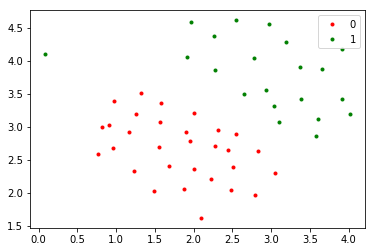

In [426]:
plt.plot(class0[0], class0[1], "r.", label = "0")
plt.plot(class1[0], class1[1], "g.", label = "1")
plt.legend()

### Generate & Plot Boundary Line

In [427]:
c = SVC(kernel="linear")
c.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

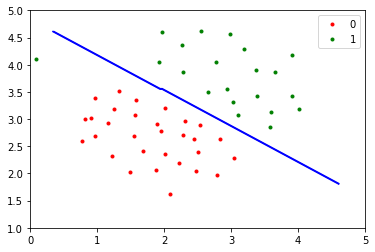

In [428]:
plt.plot(class0[0], class0[1], "r.", label = "0")
plt.plot(class1[0], class1[1], "g.", label = "1")

x1 = np.linspace(X[:,0].min(),X[:,1].max(),num=150)
x2 = np.linspace(X[:,1].min(),X[:,1].max(),num=150)

X_1,X_2 = np.meshgrid(x1,x2)
plt.contour(X_1,X_2,c.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")

plt.xlim(0,5)
plt.ylim(1,5)
plt.legend()

## Part 2: SVM Module with Gaussian Kernel

### Get Data

In [429]:
mat1 = loadmat("ali_shazal_as10505_ex6data2.mat")

X = mat1["X"]
y = mat1["y"]

class0 = [[],[]]
class1 = [[],[]]

for i in range(len(y)):
    if y[i] == 0:
        for j in range(2):
            class0[j].append(X[i][j])
            
    else:
        for j in range(2):
            class1[j].append(X[i][j])

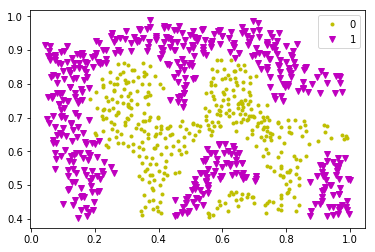

In [430]:
plt.plot(class0[0], class0[1], "y.", label = "0", marker=".")
plt.plot(class1[0], class1[1], "m.", label = "1", marker="v")
plt.legend()

### Generate & Plot Boundary Line 

In [431]:
c = SVC(kernel="rbf",gamma=30)
c.fit(X,y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(0.4, 1)

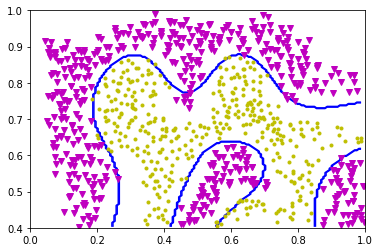

In [432]:
plt.plot(class0[0], class0[1], "y.", label = "0", marker=".")
plt.plot(class1[0], class1[1], "m.", label = "1", marker="v")

x1 = np.linspace(X[:,0].min(),X[:,1].max(),num=150)
x2 = np.linspace(X[:,1].min(),X[:,1].max(),num=150)

X_1,X_2 = np.meshgrid(x1,x2)
plt.contour(X_1,X_2,c.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")

plt.xlim(0,1)
plt.ylim(0.4,1)

## Part 3: Cancer Data

### Set up dataframe

In [433]:
cancerDataset = sklearn.datasets.load_breast_cancer()
cancerDataframe = pd.DataFrame(cancerDataset.data, columns=cancerDataset.feature_names)

cancerDataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split Training & Testing Data

In [434]:
trainingX, testingX, trainingY, testingY = train_test_split(cancerDataset.data, cancerDataset.target, test_size=0.4)

### Training

In [435]:
c = SVC(kernel='linear')
c.fit(trainingX, trainingY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Prediction

In [436]:
predictedY = c.predict(testingX)

### Evaluation

In [437]:
print(metrics.classification_report(testingY, predictedY, target_names = ["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.94      0.94      0.94        77
         Yes       0.97      0.97      0.97       151

   micro avg       0.96      0.96      0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228

